#  3  DATA PREPARATION FOR INDEPTH ANALYSES

***

##  3.1    Importing foundational libraries


### Access to the system's parameters (https://docs.python.org/3/library/sys.html)

In [1]:
import sys 
print("Python version: {}". format(sys.version))
print('-'*100)

Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
----------------------------------------------------------------------------------------------------



### Pandas is a collection of functions which comes in form of dataframes with SQL-like features for data processing and analysis

In [2]:
import pandas as pd 
print("pandas version: {}". format(pd.__version__))

pandas version: 0.20.1



### Matplotlib gives us a collection of functions for scientific and publication-ready visualization

In [3]:
import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

matplotlib version: 2.0.2



### For mathematical and scientific computing a good starting package will be NumPy

In [4]:
import numpy as np 
print("NumPy version: {}". format(np.__version__))

NumPy version: 1.14.2



### SciPy also has a pretty good collection of functions for scientific computing and advanced mathematics

In [5]:
import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

SciPy version: 1.2.1



### Sklearn provides a range of dazzling machine learning algorithms which is quite effective for data analyses

In [6]:
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

scikit-learn version: 0.18.2



### Let me add IPython to it. Or perhaps, import it for its display funtion in order to beautify the pandas dataframes in the jupyter notebook

In [7]:
import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

IPython version: 5.3.0



### Who doesn't factor miscellaneous functions? Two most import ones: Time and randomization. 
>### Let me also ignore warnings such as deprecation alerts, etc. for a smooth guide.

In [8]:
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*100)

----------------------------------------------------------------------------------------------------


***
##  3.2    Importing the data modeling libraries

### Importing models / algorithms for the analyses

In [9]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

### Importing some model helpers from the libraries in section 3.1

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

### Loading other functions for a good visualization of the entire modeling process and analysis

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

***
##  3.3 Knowing the Data We Will Deal With

### In this section, we perform a first initial attempt to know what the data is made up of. Fortunately, ANZ and DataCastle gave an elaboratate meaning of what to expect.

***
### INPUT VARIABLES
***

### Bank client data:
>#### 1. Age (numeric)
>#### 2. Job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
>#### 3. Marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
>#### 4. Education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
>#### 5. Default: has credit in default? (categorical: 'no','yes','unknown')
>#### 6. Housing: has home loan? (categorical: 'no','yes','unknown')
>#### 7. Loan: has personal loan? (categorical: 'no','yes','unknown')
 
### Related with the last contact of the current campaign:
>#### 8. Contact: contact communication type (categorical: 'cellular','telephone') 
>#### 9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
>#### 10. Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
>#### 11. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###  Other attributes:
>#### 12. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
>#### 13. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
>#### 14. Previous: number of contacts performed before this campaign and for this client (numeric)
>#### 15. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###  Social and economic context attributes：
>#### 16. Emp.var.rate: employment variation rate. quarterly indicator (numeric)
>#### 17. Cons.price.idx: consumer price index. monthly indicator (numeric) 
>#### 18. Cons.conf.idx: consumer confidence index. monthly indicator (numeric) 
>#### 19. Euribor3m: euribor 3 month rate. daily indicator (numeric)
>#### 20. Nr.employed: number of employees. quarterly indicator (numeric)

### OUTPUT VARIABLE (desired target):
>#### 21. y - has the client subscribed a term deposit? (binary: 'yes','no')

### Despite this elaborate information, we at least want to confirm the data content is what we expect and that's what we'll be working with it through this work


***
### Declaring path to the file:
>#### You should have about 37069 rows with 21 columns

In [12]:
location ="C:/Users/King/Documents/GitHub/Customer-Response-Modeling/"
file = "DataCastleData.csv"

df = pd.read_csv(location + file)
actual_df = df.copy()

# Viewing the shape of our dataset
df.shape

print("We have " + str(df.shape[0]) + " rows with " + str(df.shape[1]) +" columns.")

We have 37069 rows with 21 columns.


# ***
##  3.4    A Statistical Overview of the Data
***
>### We have 37069 rows (entries) with 21 columns which include the target field (columns)
>### Let's have a peep of how it really looks like...

#### Viewing the first five rows (the head) of our dataset

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,26,admin.,single,university.degree,no,no,no,telephone,aug,mon,...,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
1,35,blue-collar,married,unknown,no,yes,no,cellular,may,thu,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,yes
2,42,self-employed,married,university.degree,no,yes,no,cellular,apr,tue,...,1,999,1,failure,-1.8,93.075,-47.1,1.423,5099.1,yes
3,46,housemaid,married,high.school,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,yes
4,41,services,single,high.school,no,yes,yes,cellular,apr,wed,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,yes


#### Viewing the last five rows (the tail) of our dataset

In [14]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37064,37,unemployed,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37065,59,admin.,married,high.school,no,yes,no,cellular,apr,wed,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,no
37066,48,blue-collar,married,professional.course,unknown,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
37067,55,retired,married,high.school,no,yes,no,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37068,45,management,single,basic.9y,no,yes,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


#### Exploring the data in a summarized way ...
>#### Getting descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.043783,258.374868,2.573552,962.543419,0.172570,0.082759,93.575098,-40.502147,3.622370,5167.150813
std,10.395798,260.203020,2.786845,186.740644,0.494031,1.571270,0.579297,4.630409,1.733892,72.168914
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Insights from the descriptive statistics

>#### Count(row number) is seen to be constant in all of the fields i.e. we have 37069 entries 
>#### Mean Age is aproximately 40 years old. (Minimum: 17 years old and Maximum: 98 years old) and together with the Standard Deviations of the fields etc.

### Knowing the concise summary of the DataFrame is necessary for arriving at plausible solutions precisely.
#### We use method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### Check to see if there are any missing values in our data set

In [17]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Fortunately, there are no missing values. If there were missing values I will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

### Nevertheless, it seems there is no mission value in any of the fields or columns but then, an insight reveals that the empty values were filled with "unknowns".
<br>

<i><font color=red size=4>Processing the data with "unknowns" might seem fine, but the semantic uniqueness and the pragmatic meaning might gear our learning models towards unrealistic results

For instance, unknown in the 'marital' column might be represented as a new marital status and classified as such. Meanwhile, these unknowns may have belonged to any of the definite options: single, married or divorced. 
</font>
</i>
### With this in mind, I carefully noted it down as we might want to handle them properly during the data imputation, in order not to flout data semantics and pragmatics in the modeling.

***
>### In accordance with the dataframe information we generated early on, memory is 5.9+ MB. In a corporate world, we would care much about memory optimization. Below, we would seek to optimize the memory usage to an extent.

#### Verifying the memory usage of each column in bytes 

In [18]:
print(df.memory_usage())
print('-'*100)

memory1 = df.memory_usage(index=True).sum()
print(memory1/ 1024**2," MB - Memory Allocation")

Index                 80
age               296552
job               296552
marital           296552
education         296552
default           296552
housing           296552
loan              296552
contact           296552
month             296552
day_of_week       296552
duration          296552
campaign          296552
pdays             296552
previous          296552
poutcome          296552
emp.var.rate      296552
cons.price.idx    296552
cons.conf.idx     296552
euribor3m         296552
nr.employed       296552
y                 296552
dtype: int64
----------------------------------------------------------------------------------------------------
5.939170837402344  MB - Memory Allocation


### From the results above, I realized that the default memory allocation has been given and memory is about 5.93917 MB. Nevertheless, field like 'integers', 'floats' etc could have a reduced memory allocation if possible. (A background in Computer Engineering enables me to add this minor techniques but in relation to big data, this approach would really help).

#### Hence, I seek to reduce memory allocation wherever possible by changing the datatypes to a optimized preference

In [19]:
def alter_datatype(df):
    int_fields = list(df.select_dtypes(include=['int']).columns)
    for field in int_fields:
        if ((np.max(df[field]) <= 127) and(np.min(df[field] >= -128))):
            df[field] = df[col].astype(np.int8)
        elif ((np.max(df[field]) <= 32767) and(np.min(df[field] >= -32768))):
            df[field] = df[field].astype(np.int16)
        elif ((np.max(df[field]) <= 2147483647) and(np.min(df[field] >= -2147483648))):
            df[field] = df[field].astype(np.int32)
        else:
            df[field] = df[field].astype(np.int64)

# Calling the alteration function we above
alter_datatype(df)

def alter_datatype_float(df):
    float_fields = list(df.select_dtypes(include=['float']).columns)
    for field in float_fields:
        df[field] = df[field].astype(np.float32)

# Calling the alteration function we above
alter_datatype_float(df)

# Rechecking
print(df.memory_usage())

print('-'*100)
memory2 = df.memory_usage(index=True).sum()
print(memory2/ 1024**2," MB")

print('-'*100)

print("We just saved: ")
print((memory1-memory2)/ 1024**2," MB - Optimized Memory Allocation")

print('-'*100)
print(df.info())

Index                 80
age               296552
job               296552
marital           296552
education         296552
default           296552
housing           296552
loan              296552
contact           296552
month             296552
day_of_week       296552
duration          296552
campaign          296552
pdays             296552
previous          296552
poutcome          296552
emp.var.rate      148276
cons.price.idx    148276
cons.conf.idx     148276
euribor3m         148276
nr.employed       148276
y                 296552
dtype: int64
----------------------------------------------------------------------------------------------------
5.232135772705078  MB
----------------------------------------------------------------------------------------------------
We just saved: 
0.7070350646972656  MB - Optimized Memory Allocation
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Range

>### I have optimized the allocation of data in the storage. Some floating point were in 64-bit. There were pushed to 32-bits.That's good for the whole practicality of this work.

<i><font color=blue size=5>Now, the memory space is obtain 5.2+ MB after optimizing the allocation. That's great!</font></i>

***
### As highlighted early on, I have a number of fields that are non-numeric. Some algorithms find it difficult in computing some non-numeric variables so I will convert these variables into categorical variables

### I will also do some renaming of the fields so I can easily express myself. Nice!.

In [20]:
# Renaming certain columns for better readability
df = df.rename(columns={'day_of_week': 'dayOfWeek', 
                        'emp.var.rate': 'empVarRate',
                        'cons.price.idx': 'consPriceIdx',
                        'cons.conf.idx': 'consConfIdx',
                        'nr.employed': 'numEmployed'
                        })

df["job"] = df["job"].astype('category').cat.codes
df["marital"] = df["marital"].astype('category').cat.codes
df["education"] = df["education"].astype('category').cat.codes
df["housing"] = df["housing"].astype('category').cat.codes
df["loan"] = df["loan"].astype('category').cat.codes
df["contact"] = df["contact"].astype('category').cat.codes
df["default"] = df["default"].astype('category').cat.codes
df["month"] = df["month"].astype('category').cat.codes
df["dayOfWeek"] = df["dayOfWeek"].astype('category').cat.codes
df["poutcome"] = df["poutcome"].astype('category').cat.codes
df["y"] = df["y"].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age             37069 non-null int64
job             37069 non-null int8
marital         37069 non-null int8
education       37069 non-null int8
default         37069 non-null int8
housing         37069 non-null int8
loan            37069 non-null int8
contact         37069 non-null int8
month           37069 non-null int8
dayOfWeek       37069 non-null int8
duration        37069 non-null int64
campaign        37069 non-null int64
pdays           37069 non-null int64
previous        37069 non-null int64
poutcome        37069 non-null int8
empVarRate      37069 non-null float32
consPriceIdx    37069 non-null float32
consConfIdx     37069 non-null float32
euribor3m       37069 non-null float32
numEmployed     37069 non-null float32
y               37069 non-null int8
dtypes: float32(5), int64(5), int8(11)
memory usage: 2.5 MB


### Awesome! By changing the objects to int8's, I have even optimized the memory further. 
<i><font color=blue size=5>The memory space is now 2.5 MB! That's a huge improvement from 5.9+ MB.</font></i>

### Lemme do check what's happening in the dataframe. Just viewing the top of the entries

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,...,campaign,pdays,previous,poutcome,empVarRate,consPriceIdx,consConfIdx,euribor3m,numEmployed,y
0,26,0,2,6,0,0,0,1,1,1,...,1,3,1,2,-1.7,94.027000,-38.299999,0.904,4991.600098,1
1,35,1,1,7,0,2,0,0,6,2,...,3,999,0,1,-1.8,92.892998,-46.200001,1.327,5099.100098,1
2,42,6,1,6,0,2,0,0,0,3,...,1,999,1,0,-1.8,93.074997,-47.099998,1.423,5099.100098,1
3,46,3,1,3,0,2,0,0,1,0,...,1,999,0,1,-2.9,92.200996,-31.400000,0.881,5076.200195,1
4,41,7,2,3,0,2,2,0,0,4,...,2,999,0,1,-1.8,93.074997,-47.099998,1.415,5099.100098,1


***
### Now, let's check the overview of the target data (field)

In [22]:
turnover_Summary = df.groupby('y')
turnover_Summary.mean()

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,duration,campaign,pdays,previous,poutcome,empVarRate,consPriceIdx,consConfIdx,euribor3m,numEmployed
y,,,,,,,,,,,,,,,,,,,,
0,39.924973,3.691625,1.162574,3.698037,0.224049,1.069163,0.327519,0.390513,4.228455,1.998025,221.099611,2.640148,984.307676,0.131822,0.913456,0.250234,93.603607,-40.596561,3.812850,5176.290039
1,40.983417,3.942322,1.252103,4.094208,0.095169,1.100457,0.312665,0.171113,4.196828,2.067532,553.172795,2.046864,790.416967,0.494833,1.062245,-1.241745,93.349617,-39.755444,2.115928,5094.873535


### It can be observed that the duration mean of 'yes' (1) are far greater than 'no' (0).
>#### Lemme do some semantic analysis over here! 
> Unfortunately, the duration of the client is not known, until you make the call and after you end the conversation.  To create > a model that would aid the corporation in realizing potential attributes that person who signup possesses, 'duration' is surely not a factor. It is best to drop it.

#### Aside, 'duration', the mean of previous seem to also make an impact in the 'yes'. Nevetherless, this is barely anything to base the reality on. Therefore, we conduct a further analysis to mine deeper insights  on the data 

### We can start out and review the spread of each attribute by looking at box and whisker plots.

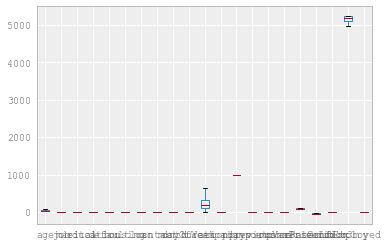

In [23]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
df.boxplot()

***
### Let's have a look at the histogram distribution of the data
>### This would let us note interesting properties of the attribute distributions such as the possible normal distribution of attributes

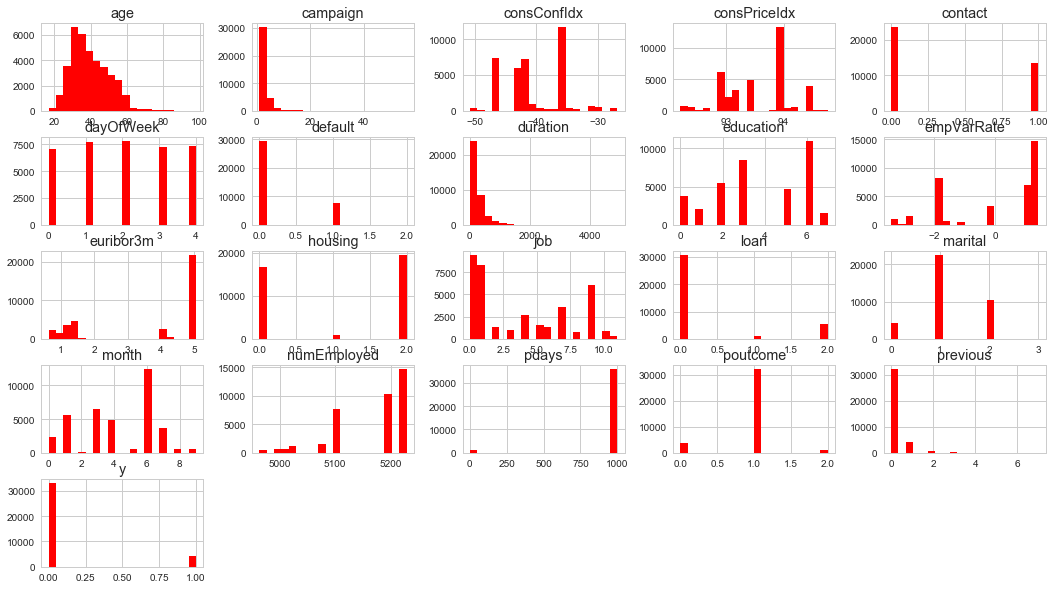

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(18,10), color='red')
plt.show()

***
### Next, an essential relationship to explore how each attribute is related to the target attribute. The first 20 is for the first class, and the last, is for the second class

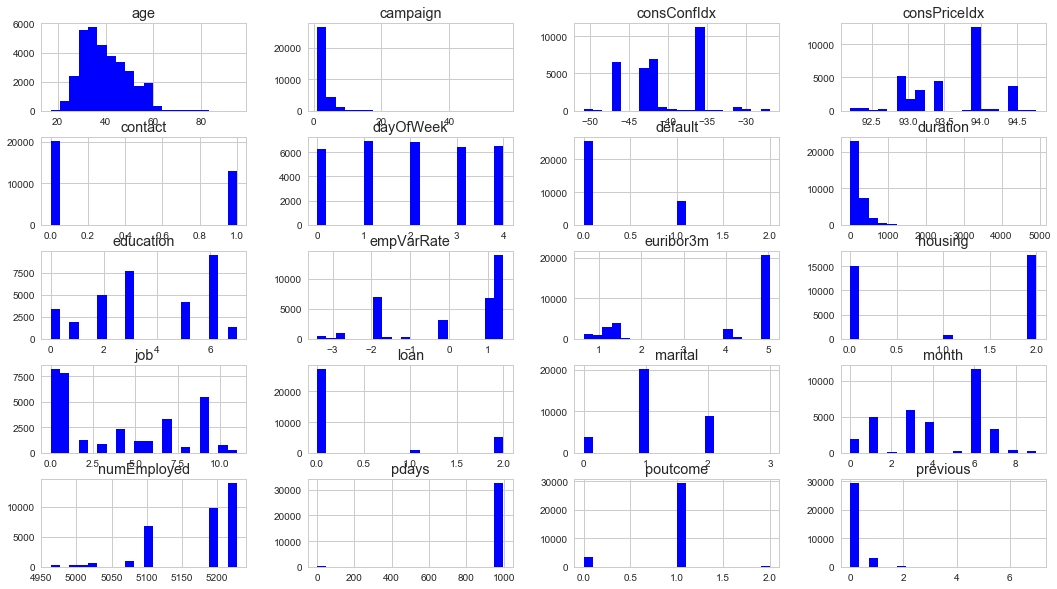

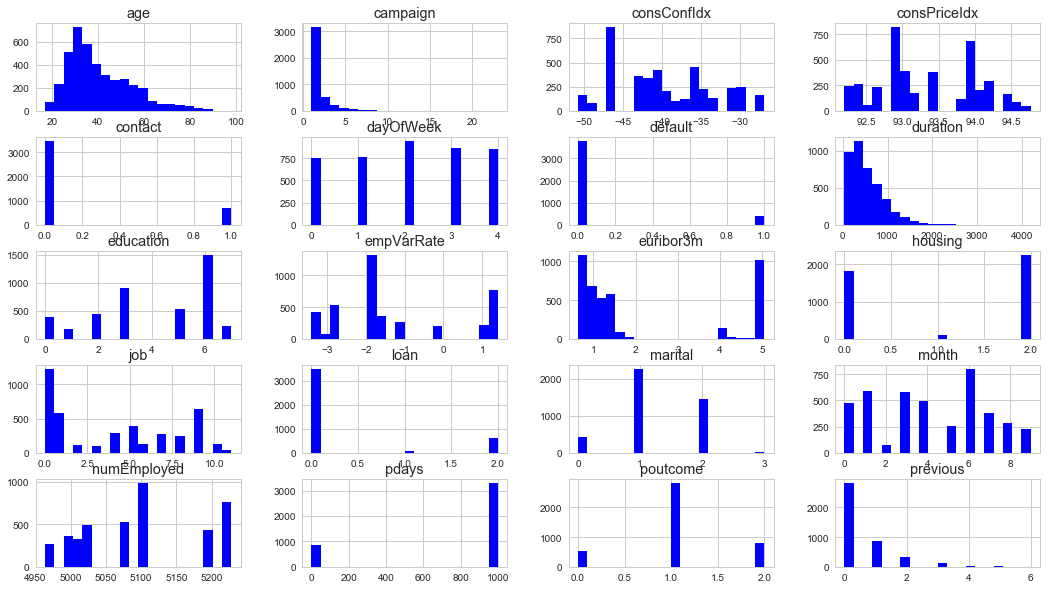

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').hist(bins=20, figsize=(18,10), color='blue')
plt.show()

***
### In order to clear assess each variable and the target class, let take our time to view their distributions

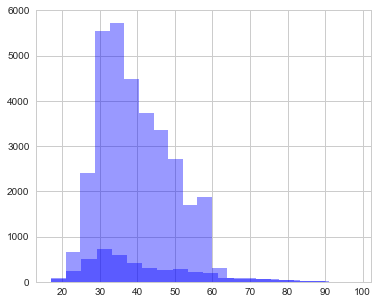

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').age.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Job vs Target

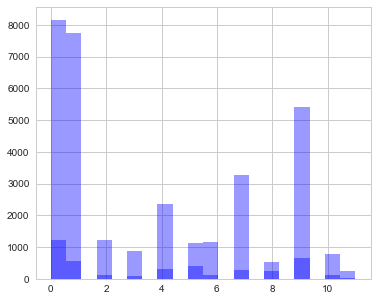

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').job.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Marital vs Target

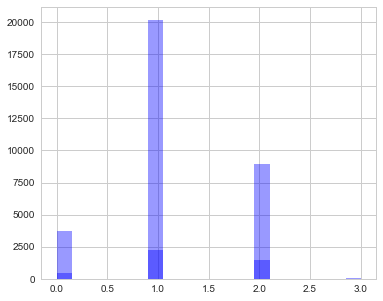

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').marital.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Education vs Target

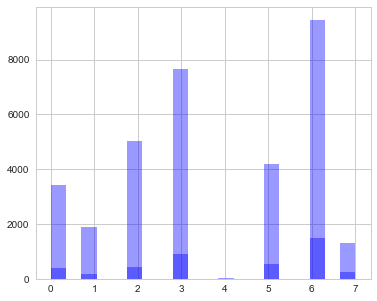

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').education.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Default vs Target

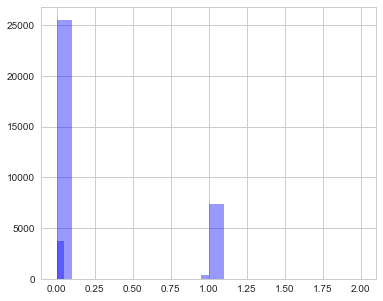

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').default.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Housing vs Target

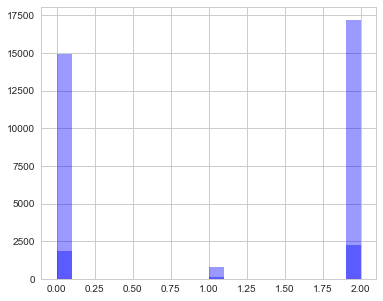

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').housing.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()